# **Exploratory Data Analysis on the Titanic Dataset**

## Import Libraries

In [1]:
# data exploration
import pandas as pd
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
import pandas_profiling 

# data visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
## https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


## Load Data

In [2]:
df = pd.read_csv('Titanic.csv')
df.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [3]:
df.tail(5)

PassengerId  Survived  Pclass  ...   Fare Cabin  Embarked
886          887         0       2  ...  13.00   NaN         S
887          888         1       1  ...  30.00   B42         S
888          889         0       3  ...  23.45   NaN         S
889          890         1       1  ...  30.00  C148         C
890          891         0       3  ...   7.75   NaN         Q

[5 rows x 12 columns]

In [4]:
df.sample(5)

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
574          575         0       3  ...   8.0500   NaN         S
511          512         0       3  ...   8.0500   NaN         S
850          851         0       3  ...  31.2750   NaN         S
623          624         0       3  ...   7.8542   NaN         S
441          442         0       3  ...   9.5000   NaN         S

[5 rows x 12 columns]

Source: https://www.kaggle.com/c/titanic

### Data Dictionary
[![titanic-data.png](https://i.postimg.cc/gjRPpW8s/titanic-data.png)](https://postimg.cc/7JxR1jBJ)

## Descriptive Statistics

In [5]:
# check dataset's variables, non-null values, and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# check number of unique data in each columns
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
# separate categorical and numerical variables
cats = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
nums = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

### Checking for null values

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Statistical summary

In [9]:
df.describe()

PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

In [10]:
df[cats].describe()

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644

In [11]:
df[nums].describe()

PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

## Pandas Profiling
The simple and fast way to perform exploratory data analysis of a Pandas Dataframe.

In [12]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
# export report into an interactive HTML file
profile = df.profile_report(title='Pandas Profiling Report on Titanic Data')
profile.to_file(output_file="Titanic Data Profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Univariate Analysis
* For numerical variable, use box plot and dist plot.
* For categorical variable, use countplot.

### Box Plots

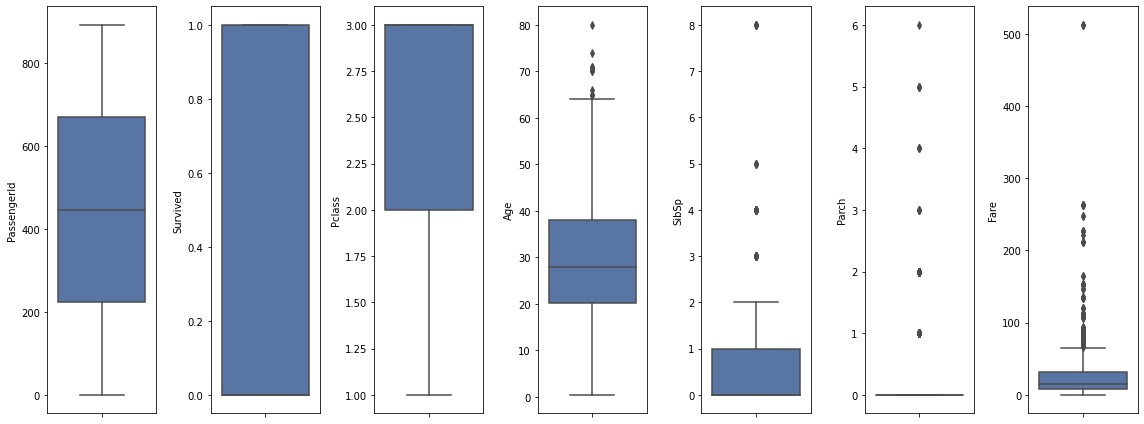

In [14]:
plt.figure(figsize=(16,6))

for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

# https://seaborn.pydata.org/generated/seaborn.boxplot.html

### Distribution Plots

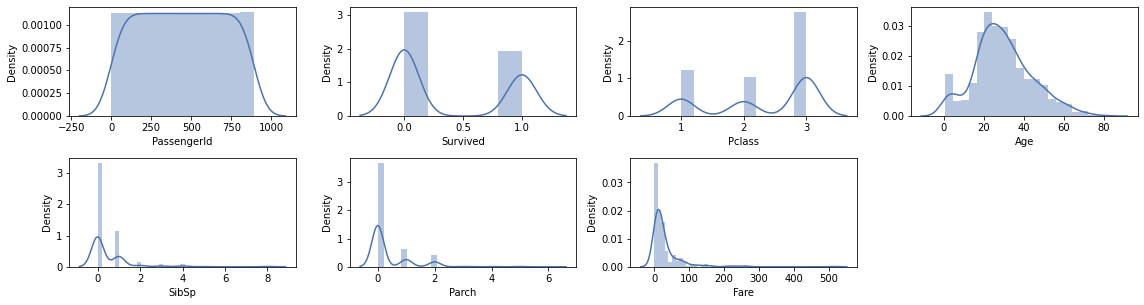

In [15]:
plt.figure(figsize=(16,6))

for i in range(0, len(nums)):
    plt.subplot(3, 4, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

# https://seaborn.pydata.org/generated/seaborn.distplot.html

### Count Plots

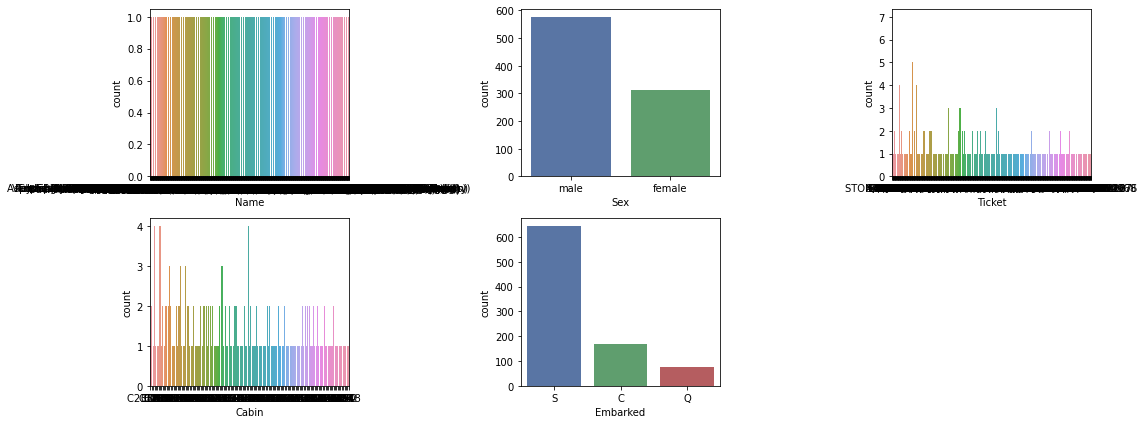

In [16]:
plt.figure(figsize=(16,6))

for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(df[cats[i]], orient='v')
    # plt.xticks(rotation=20)
    # plt.xlabel(cats[i],fontsize=7)
    plt.tight_layout()

# https://seaborn.pydata.org/generated/seaborn.countplot.html

## Bivariate Analysis

### Heatmap

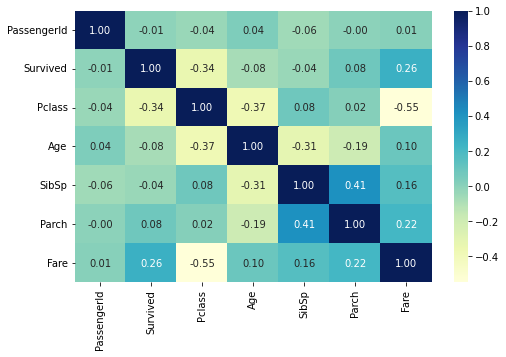

In [17]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f')

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# https://fmt.dev/latest/syntax.html



---



---



---

# **Deep Dive into Each Variables in the Titanic Dataset**

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Variables Description
1. PassengerId: unique id number to each passenger
2. Survived: passenger survived (1) or died (0)
3. Pclass: passenger class
4. Name: name of passenger
5. Sex: gender of passenger 
6. Age: age of passenger 
7. SibSp: number of siblings/spouses (sibling = brother, sister, stepbrother, stepsister and spouse = husband, wife)
8. Parch: number of parents/children 
9. Ticket: ticket number 
10. Fare: amount of money spent on ticket
11. Cabin: cabin category
12. Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2): Age, Fare
* int64(5): PassengerId, Survived, Pclass, SibSp, Parch
* object(5): Name, Sex, Ticket, Cabin, Embarked

## Types Of Features

### *Categorical Feature*
A categorical variable is one that has two or more categories and each value in that feature can be categorized by them. For example, gender is a categorical variable having two categories (male and female). We **cannot sort or give any ordering** to such variables. They are also known as **Nominal Variables**.

**Categorical Feature in the dataset: Sex, Embarked**

### *Ordinal Feature*
An ordinal variable is similar to categorical values, but the difference between them is that we can have **relative ordering or sorting between the values**. For example, if we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.

**Ordinal Feature in the dataset: PClass**

### *Continuous Feature*
A feature is said to be continuous if **it can take values between any two points (determined by measuring)** or between the minimum or maximum values in the features column.

**Continous Feature in the dataset: Age**

### *Discrete Feature*
A feature is said to be discrete if **it takes fixed values determined by counting (can't take values between any two points)** in the features column.

**Continous Feature in the dataset: SibSp**

## Analyzing the Features

### Categorical Feature: Sex

In [20]:
# check the count of people survived grouped by sex
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [21]:
pd.crosstab(df.Sex,df.Survived,margins=True).style.background_gradient(cmap='YlGnBu')
# set margins = True to get the total (All) values

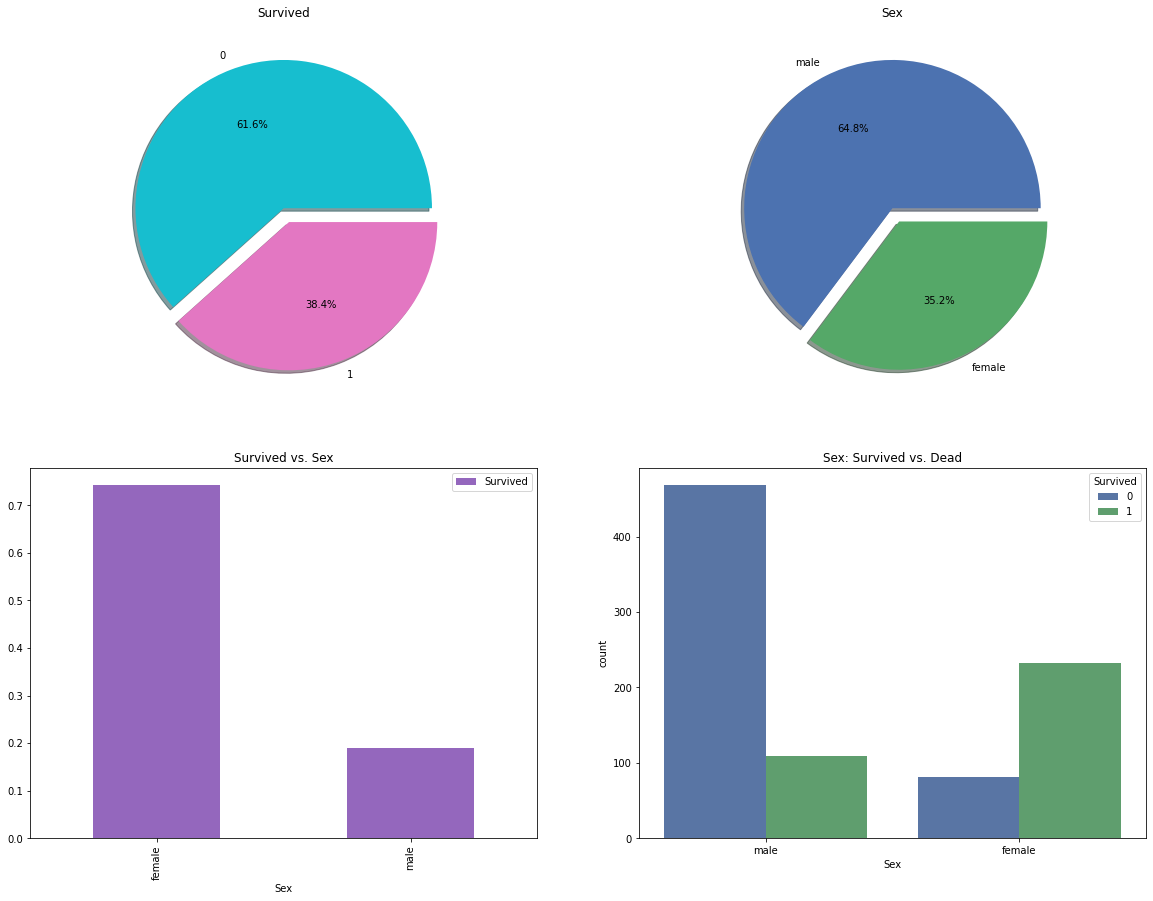

In [22]:
# plot the data
f,ax=plt.subplots(2,2,figsize=(20,15))
# proportion of survived
df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',colors=['tab:cyan','tab:pink'],ax=ax[0,0],shadow=True)
ax[0,0].set_title('Survived')
ax[0,0].set_ylabel('')
# proportion of sex
df['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0,1],shadow=True)
ax[0,1].set_title('Sex')
ax[0,1].set_ylabel('')
# count of survived based on sex
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(color='tab:purple',ax=ax[1,0])
ax[1,0].set_title('Survived vs. Sex')
# count of survived and dead based on sex
sns.countplot('Sex',hue='Survived',data=df,ax=ax[1,1])
ax[1,1].set_title('Sex: Survived vs. Dead')
plt.show()

# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
# https://matplotlib.org/stable/gallery/color/named_colors.html
# remember that to color pieplot, use 'colors=' but for barplot, use 'color='

In [23]:
# Sex count
df.groupby('Sex')['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

In [24]:
# Sex vs. Survived
df[['Sex','Survived']].groupby(['Sex']).mean().sort_values(by="Survived",ascending = False)

Survived
Sex             
female  0.742038
male    0.188908

The number of men on the ship (577) is lot more than the number of women (314), still the number of women saved is almost twice the number of males saved. **The survival rates for a women on the ship is around 74,2% while that for men is 18,9%.** This indicates that women are the priority of the rescue.

### Ordinal Feature: Pclass

In [25]:
# check the count of people survived grouped by passenger class
df.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [26]:
pd.crosstab(df.Pclass,df.Survived,margins=True).style.background_gradient(cmap='YlGnBu')
# set margins = True to get the total (All) values

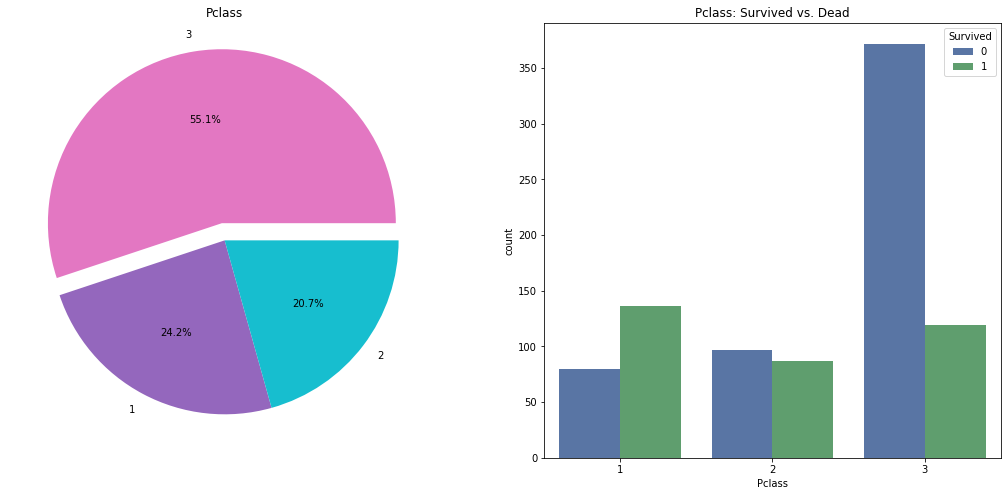

In [27]:
# plot the data
f,ax=plt.subplots(1,2,figsize=(18,8))
# proportion of passengers by class
df['Pclass'].value_counts().plot.pie(explode=[0.1,0,0],autopct='%1.1f%%',colors=['tab:pink','tab:purple','tab:cyan'],ax=ax[0])
ax[0].set_title('Pclass')
ax[0].set_ylabel('')
# count of survived based on passenger class
sns.countplot('Pclass',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Pclass: Survived vs. Dead')
plt.show()

In [28]:
# Pclass count
df.groupby('Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

In [29]:
# Pclass vs. Survived
df[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by="Survived",ascending = False)

Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363

Here it's clearly seen that the passengers of Pclass 1 were given a very high priority while rescue. Even though the number of passengers in Pclass 3 was a lot higher, still the number of survival from them is very low, which is **24,2%**.

For Pclass 1, survival rate is **62,9%** while for Pclass 2 is  **47,2%**. **It seems like money and status matter**, even though people say "money can't buy everything."

In [30]:
# check the count of people survived grouped by sex and passenger class
df.groupby(['Sex','Pclass','Survived'])['Survived'].count()

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

In [31]:
pd.crosstab([df.Sex,df.Survived],df.Pclass,margins=True).style.background_gradient(cmap='YlGnBu')
# set margins = True to get the total (All) values

<Figure size 720x720 with 0 Axes>

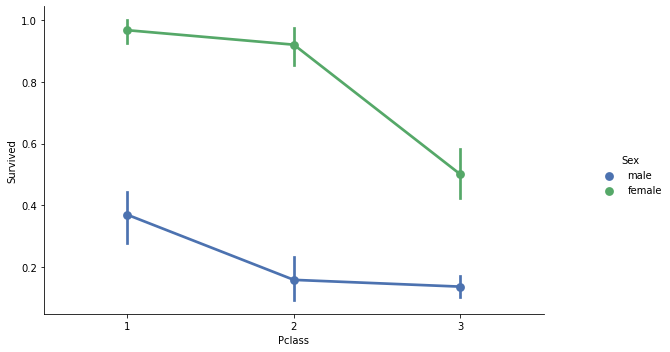

In [32]:
# factor plot
plt.figure(figsize=(10,10))
sns.factorplot('Pclass','Survived',hue='Sex',data=df)
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

# https://www.geeksforgeeks.org/python-seaborn-factorplot-method/
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.gcf.html

In [33]:
# Sex & Pclass vs. Survived
df[['Sex','Survived','Pclass']].groupby(['Sex','Pclass']).mean().sort_values(by="Survived",ascending = False)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

**Factor plot** is used in this case because the plot makes the separation of categorical values easy.

Looking at the **cross tab** and the **factor plot**, it can easily be inferred that survival rate for **women from Pclass1** is **96,8%**, as only 3 out of 94 women from Pclass1 died. 

It is evident that **irrespective of Pclass, women were given first priority while rescue,** even men from Pclass1 have a very low survival rate.

### Continuous Feature: Age

In [34]:
print('Oldest Passenger on Titanic:',df['Age'].max(),'Years')
print('Youngest Passenger on Titanic:',df['Age'].min(),'Years')
print('Average Age on Titanic:',df['Age'].mean(),'Years')

Oldest Passenger on Titanic: 80.0 Years
Youngest Passenger on Titanic: 0.42 Years
Average Age on Titanic: 29.69911764705882 Years


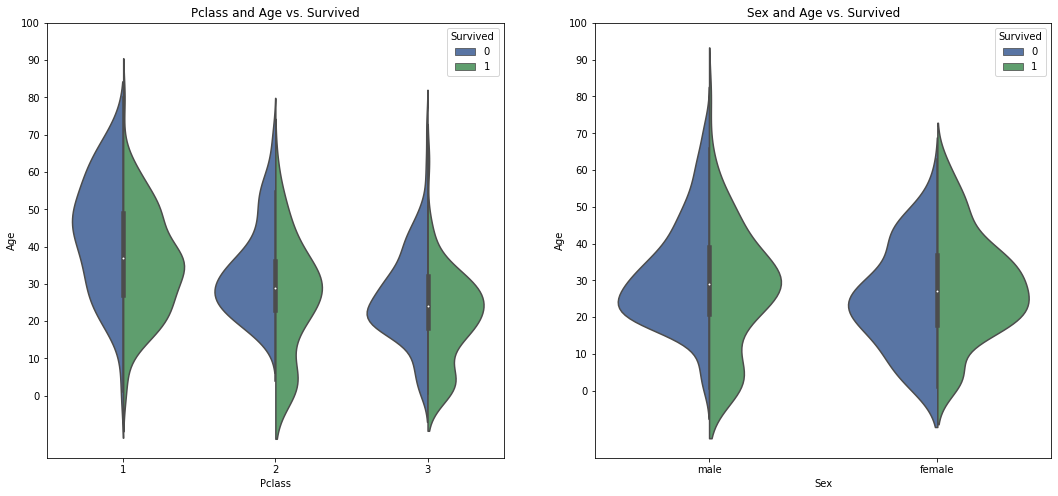

In [35]:
# plot the data
# compare the distribution using violin plot
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue="Survived",data=df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs. Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs. Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

# https://seaborn.pydata.org/generated/seaborn.violinplot.html

It can be seen that:

1. The number of children increases with Pclass and the survival rate for passengers below Age 10 (i.e children) seems to be good irrespective of the Pclass.

2. Survival chances for passengers aged 20-50 from Pclass1 are high and are even better for women.

3. For men, the survival chances decrease with an increase in age.

### Filling Null Values in Age

In [36]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Age feature has **177** null values. The mean age of the dataset can be assigned to replace these NaN values, but the problem is, there were many people of many different ages. For example, a 4-year kid can't just be assigned with the mean age that is 22 years. 

**The way to find out what age-band the passenger lies in is by checking the Name feature.** Looking upon the feature, it can be seen that the names have a salutation like Mr. or Mrs. Thus, the mean values of Mr. and Mrs. can be assigned to the respective groups.

In [37]:
# extract the salutations from the Name feature
df['Initial']=0
for i in df:
    df['Initial']=df.Name.str.extract('([A-Za-z]+)\.')

Regex: **([A-Za-z]+)\.** looks for strings which lie between **A-Z or a-z** and followed by a **.(dot)**. Here, the Initials from the Name are successfully extracted.

In [38]:
# check the initials with the Sex
pd.crosstab(df.Initial,df.Sex).T.style.background_gradient(cmap='YlGnBu')

There are some misspelled initials like Mlle or Mme that stand for Miss. They can be replaced by Miss and the same thing for other values.

In [39]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                      ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [40]:
# check the average Age by initials
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [41]:
# replace the NaN values with the ceil values of the mean ages
df.loc[(df.Age.isnull())&(df.Initial=='Master'),'Age']=5
df.loc[(df.Age.isnull())&(df.Initial=='Miss'),'Age']=22
df.loc[(df.Age.isnull())&(df.Initial=='Mr'),'Age']=33
df.loc[(df.Age.isnull())&(df.Initial=='Mrs'),'Age']=36
df.loc[(df.Age.isnull())&(df.Initial=='Other'),'Age']=46

In [42]:
# check wether there are null values left 
df.Age.isnull().any()

False

Now the NaN values of the Age feature are replaced with the ceil values of the mean ages based on initials.

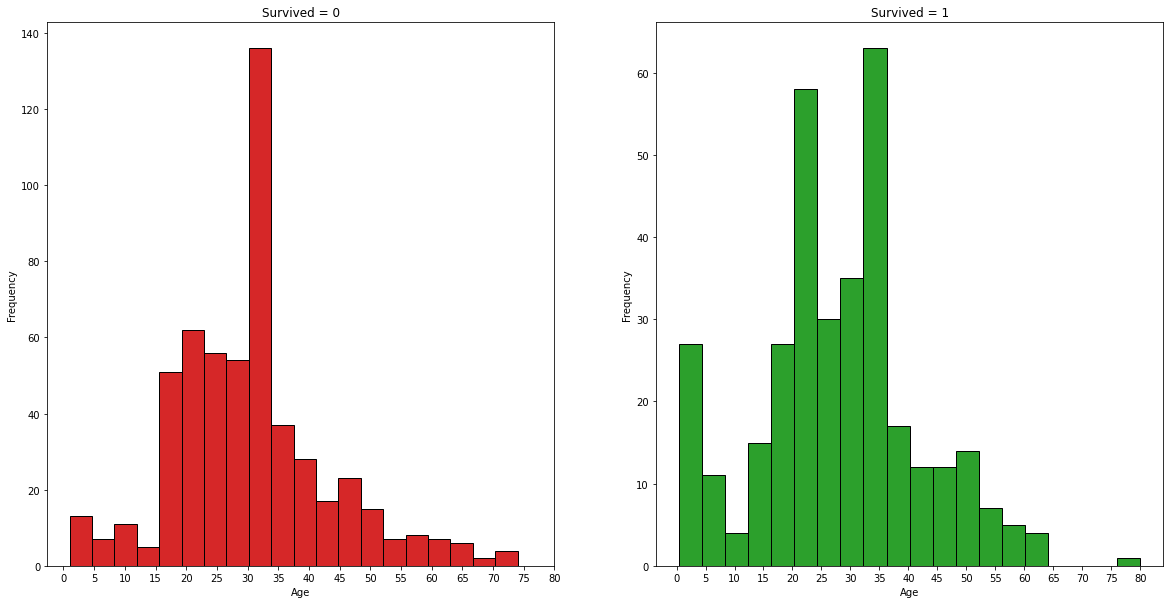

In [43]:
# plot the data
f,ax=plt.subplots(1,2,figsize=(20,10))
df[df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,color='tab:red',edgecolor='black')
ax[0].set_title('Survived = 0')
ax[0].set_xlabel('Age')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df[df['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,color='tab:green',edgecolor='black')
ax[1].set_title('Survived = 1')
ax[1].set_xlabel('Age')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

It can be seen that:

1. The toddlers (age < 5) were saved in large numbers (the women and child first policy).

2. The oldest passenger was saved (80 years).

3. The maximum number of deaths were in the age group of 30-35.

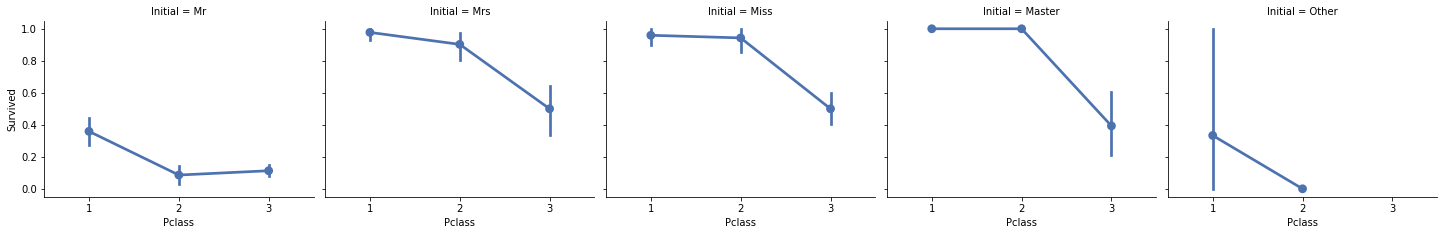

In [44]:
sns.factorplot('Pclass','Survived',col='Initial',data=df)
fig=plt.gcf()
fig.set_size_inches(20,3)
plt.show()

The women and child first policy thus holds true irrespective of the passenger class.

### Categorical Feature: Embarked

In [45]:
pd.crosstab([df.Embarked,df.Pclass],[df.Sex,df.Survived],margins=True).style.background_gradient(cmap='YlGnBu')

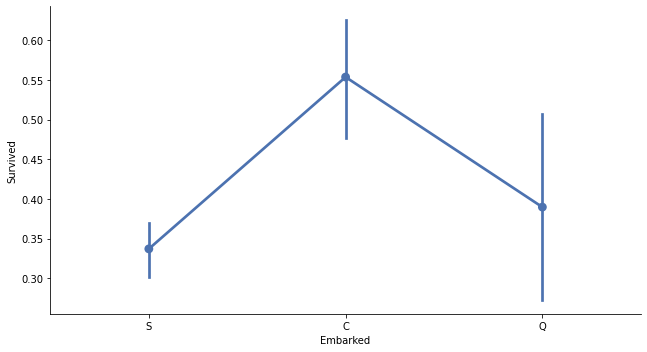

In [46]:
# chances of survival by port of embarkation
sns.factorplot('Embarked','Survived',data=df)
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

The chances for survival for Port C (Cherbourg) are the highest, which is around 0,55 while it is the lowest for Port S (Southampton).

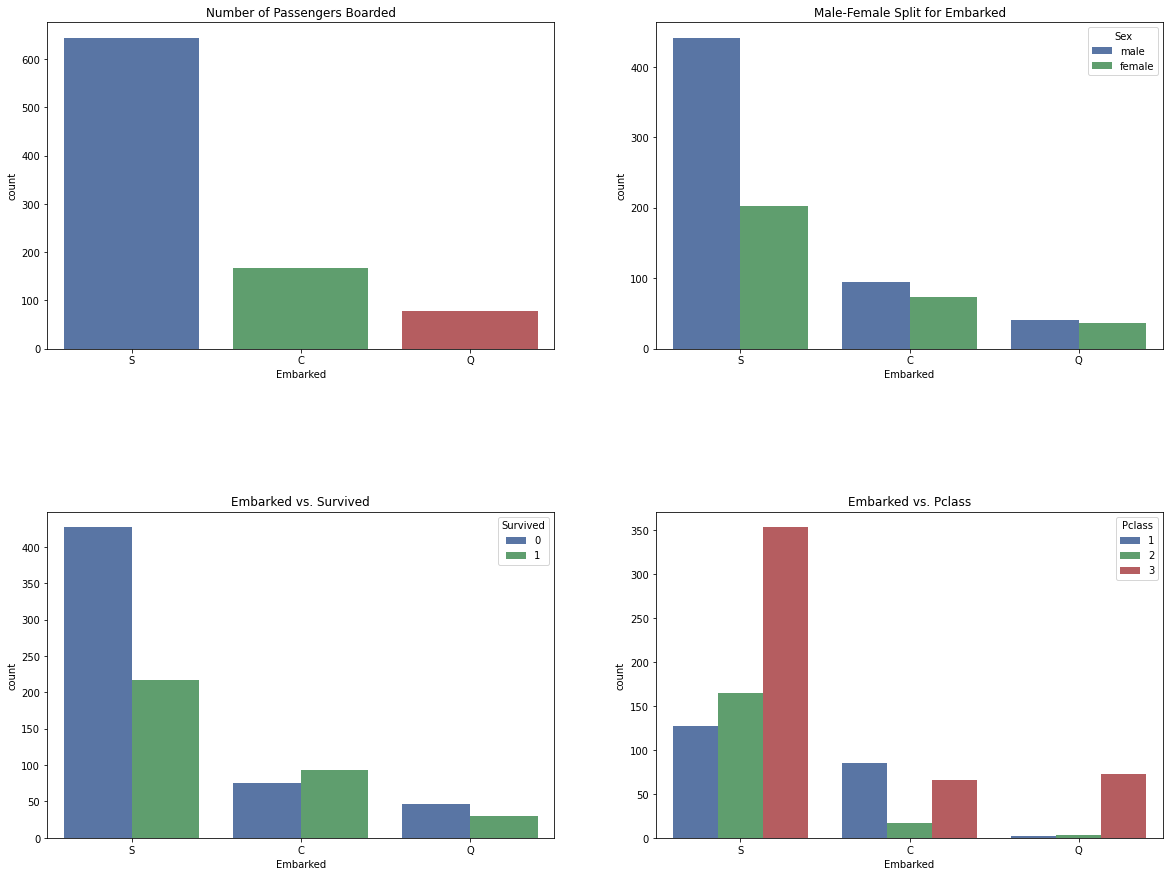

In [47]:
# plot the data
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df,ax=ax[0,0])
ax[0,0].set_title('Number of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=df,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=df,ax=ax[1,0])
ax[1,0].set_title('Embarked vs. Survived')
sns.countplot('Embarked',hue='Pclass',data=df,ax=ax[1,1])
ax[1,1].set_title('Embarked vs. Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [48]:
# check the average Survived by Pclass
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [49]:
# check the count of Survived gruped by Embarked and by Pclass
df.groupby(['Embarked','Pclass'])['Survived'].count()

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: Survived, dtype: int64

It can be seen that: 

1. The maximum number of passengers boarded is from port S (Southampton), the majority of them being from Pclass3.

2. The passengers from port C (Cherbourg) have a good proportion of them survived. This could be due to the rescue of all the Pclass1 and Pclass3 passengers.

3. The embarkation port S (Southampton) seems to be the port from where the majority of the rich people boarded, still the chances for survival are low here, shown by many passengers from Pclass3 around 80% didn't survive. 

4. Port Q (Queenstown) had almost 95% of the passengers were from Pclass3.

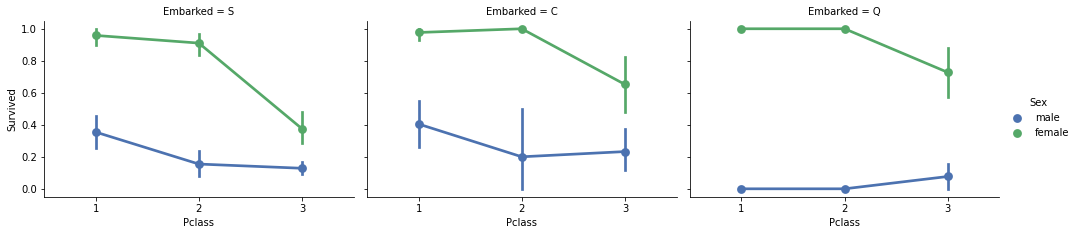

In [50]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=df)
fig=plt.gcf()
fig.set_size_inches(15,3)
plt.show()

It can be seen that: 

1. The survival chances are almost 1 for women from Pclass1 and Pclass2 irrespective of the Pclass.

2. Port S (Southampton) seems to be very unlucky for Pclass3 passengers as the survival rate for both men and women is very low.

3. Port Q (Queenstown) seems to be the unluckiest for men, as almost all were from Pclass 3.

### Filling Null Values in Embarked

It's known that the majority of passengers boarded from Port S (Southampton), so NaN values in Embarked feature are replaced with S.

In [51]:
# fill null values with the majority of Embarked
df['Embarked'].fillna('S',inplace=True)

In [52]:
# check wether there are null values left
df.Embarked.isnull().any()

False

Now the NaN values of the Embarked feature are replaced with the majority of Embarked.

### Discrete Feature: SibSp

In [53]:
pd.crosstab(df.SibSp,df.Survived,margins=True).style.background_gradient(cmap='YlGnBu')

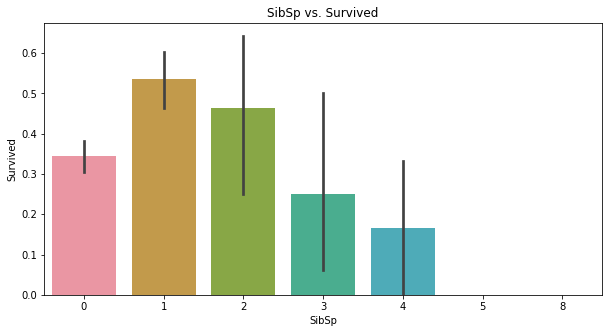

In [54]:
# plot the data
sns.barplot('SibSp','Survived',data=df)
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.title('SibSp vs. Survived')
plt.show()

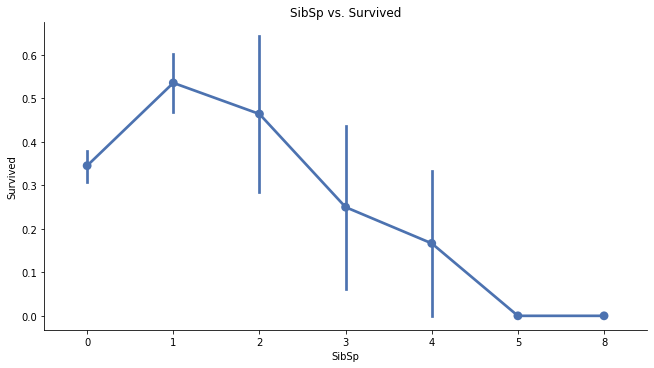

In [55]:
sns.factorplot('SibSp','Survived',data=df)
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.title('SibSp vs. Survived')
plt.show()

In [56]:
pd.crosstab(df.SibSp,df.Pclass,margins=True).style.background_gradient(cmap='YlGnBu')

In [57]:
# check the average Survived by SibSp
df.groupby('SibSp')['Survived'].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [58]:
# check the count of Survived grouped by Pclass and SibSp
df.groupby(['Pclass','SibSp'])['Pclass'].count()

Pclass  SibSp
1       0        137
        1         71
        2          5
        3          3
2       0        120
        1         55
        2          8
        3          1
3       0        351
        1         83
        2         15
        3         12
        4         18
        5          5
        8          7
Name: Pclass, dtype: int64

In [59]:
# check the average Survived grouped by Pclass and SibSp
df.groupby(['Pclass','SibSp'])['Survived'].mean()

Pclass  SibSp
1       0        0.562044
        1        0.746479
        2        0.800000
        3        0.666667
2       0        0.416667
        1        0.581818
        2        0.500000
        3        1.000000
3       0        0.236467
        1        0.325301
        2        0.333333
        3        0.083333
        4        0.166667
        5        0.000000
        8        0.000000
Name: Survived, dtype: float64

The barplot and factorplot show that if a passenger is alone onboard with no siblings, the person has a 34,5% survival rate. The graph roughly decreases if the number of siblings increases. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly, the survival rate for families with 5-8 members is 0%. The reason might be Pclass. From the crosstab, it's shown that the passengers with SibSp > 3 were all in Pclass3. It is imminent that all the large families in Pclass3 (SibSp > 3) died.

### Discrete Feature: Parched

In [60]:
pd.crosstab(df.Parch,df.Pclass,margins=True).style.background_gradient(cmap='YlGnBu')

The crosstab again shows that larger families were in Pclass3.

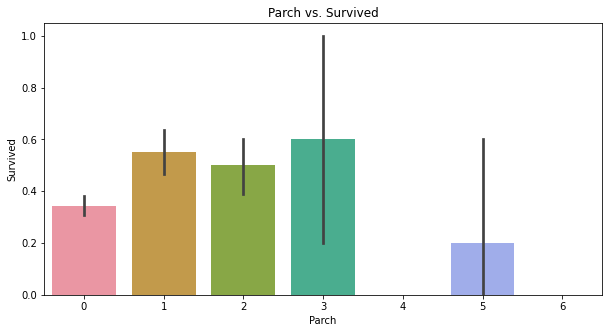

In [61]:
# plot the data
sns.barplot('Parch','Survived',data=df)
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.title('Parch vs. Survived')
plt.show()

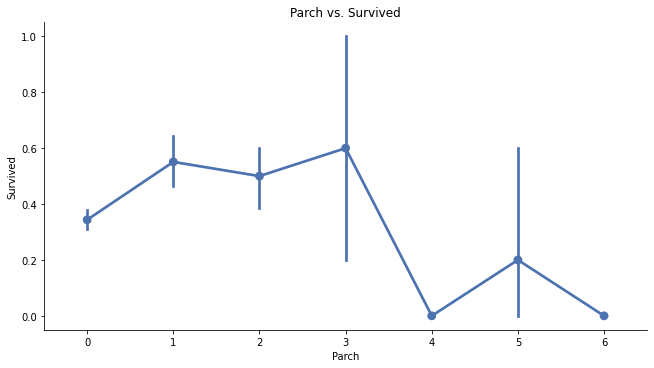

In [62]:
sns.factorplot('Parch','Survived',data=df)
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.title('Parch vs. Survived')
plt.show()

The results here are quite similar to the previous one. Passengers with their parents onboard have a greater chance of survival. It however reduces as the number goes up.

The chances of survival are good for a passenger who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decrease when a passenger has >4 parents on the ship.

### Continuous Feature: Fare

In [63]:
print('Highest Fare:',df['Fare'].max())
print('Lowest Fare:',df['Fare'].min())
print('Average Fare:',df['Fare'].mean())

Highest Fare: 512.3292
Lowest Fare: 0.0
Average Fare: 32.2042079685746


In [64]:
len(df[df['Fare']==0])

15

It seems that there were a total of 15 free rides on Titanic, the lowest fare was 0!

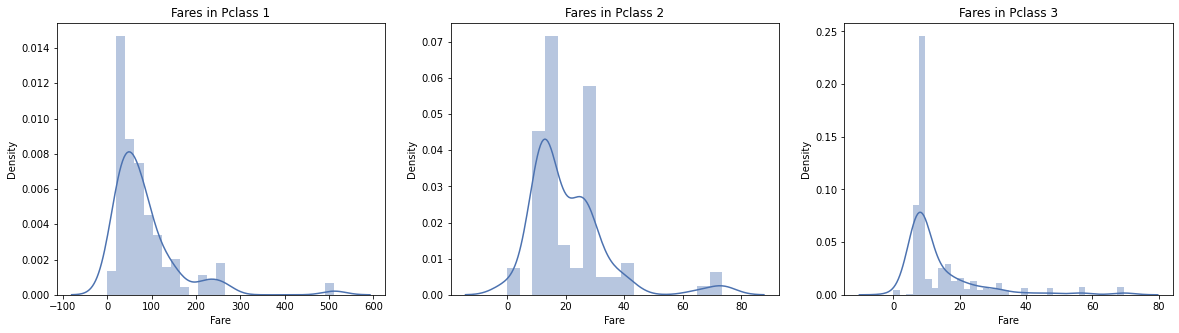

In [65]:
# plot the data
f,ax=plt.subplots(1,3,figsize=(20,5))
sns.distplot(df[df['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(df[df['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(df[df['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

There's a large distribution in the fares of passengers in Pclass1 and this distribution goes on decreasing as the standards reduce. 

## Observations Result in a Nutshell
* **Sex:** Women have a higher chance of survival than men.

* **Pclass** : There is a visible trend that being a 1st class passenger gives passengers a better chance of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is also higher than for those from Pclass2.

* **Age:** Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

* **Embarked:** The chance of survival at port C (Cherbourg) seems to be better even though the majority of Pclass1 passengers embarked from port S (Southampton). Passengers at port Q (Queenstown) were all from **Pclass3**. 

* **Parch & SibSp:** Passengers having 1-2 siblings, a spouse on board, or 1-3 parents have a greater chance of survival rather than being alone or having a large family traveling with them.

## Correlation between The Features

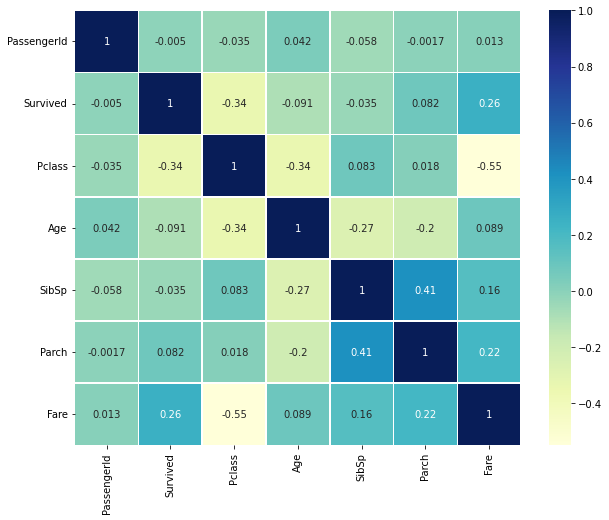

In [66]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',linewidths=0.5)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# https://seaborn.pydata.org/generated/seaborn.heatmap.html

### Heatmap Interpretation

Note that only the numeric features are compared as it is obvious that between alphabets or strings cannot be correlated. Before understanding the plot, find out what exactly correlation is.

**POSITIVE CORRELATION** 

If an **increase in feature A leads to an increase in feature B, then they are positively correlated**. A value of **1 means a perfect positive correlation**.

**NEGATIVE CORRELATION** 

If an **increase in feature A leads to a decrease in feature B, then they are negatively correlated**. A value of **-1 means a perfect negative correlation**.

When the two features are highly or perfectly correlated, the increase in one leads to an increase in the other. This means that both the features contain highly similar information and there is very little or no variance in information. This is known as **multicollinearity** as both of them contain almost the same information. This means that one of them is redundant. While making or training models, redundant features should be eliminated as it reduces training time and many such advantages.

From the above heatmap, it can be seen that the features are not much correlated. **The highest correlation is between SibSp and Parch which is 0,41.**